### Importing libraries

In [3]:
!pip install pywaffle #installed separately

     |████████████████████████████████| 526 kB 7.0 MB/s eta 0:00:01


In [6]:
!pip install wordcloud #installed separately

     |████████████████████████████████| 220 kB 9.9 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158001 sha256=65fc0f6e5e5011f3fc069dc889ee7a396022f2d0b4cdd0e17644fc840cf4e490
  Stored in directory: /Users/ashishgohil/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [8]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import pandasql as psql
sql=psql.sqldf
import numpy as np
sns.set_style("dark")
from wordcloud import WordCloud, STOPWORDS
from pywaffle import Waffle
sns.set_palette("pastel")

### Importing data

In [11]:
df = pd.read_csv('../project7/udemy_courses.csv')
df.head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.0,2016-02-21T18:23:12Z,Business Finance
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.5,2015-01-30T22:13:03Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.5,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18T18:13:32Z,Business Finance


### Columns in the csv files

In [12]:
column=df.columns
column

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

### Dropping the columns which are not required

In [13]:
df=df.drop(['course_id'], axis=1)
df.head(5)

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### checking the missing data

In [14]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing = missing_data(df)
missing

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,bool,int64,int64,int64,int64,object,float64,object,object


### Modifying content duration column

In [15]:
# Removing the string "Hour"
df['content_duration'] = df['content_duration'].astype(str).str.replace('hours','')
df['content_duration'] = df['content_duration'].astype(str).str.replace('hour','')

# Transforming mins to hours
df.loc[df['content_duration'].str.contains('mins')==True,'content_duration']=df.loc[df['content_duration'].str.contains('mins')==True,'content_duration'].str.replace('mins','').astype('float')/60

In [16]:
#Excluding strange values such as "question" "beginner level" from the df.
df=sql('''select * from df where content_duration not like ("%question%") and content_duration not like ("%Beginner Level%")''')

df['content_duration']=df['content_duration'].astype('float').round(2)

df['content_duration'].unique()

array([ 1.5 , 39.  ,  2.5 ,  3.  ,  2.  ,  1.  ,  5.  ,  7.  ,  4.  ,
        0.58,  4.5 ,  6.5 , 10.  ,  5.5 ,  7.5 , 11.5 , 16.  ,  3.5 ,
        9.  ,  8.5 , 11.  ,  0.7 ,  9.5 ,  0.55, 62.  ,  0.13,  0.68,
       31.5 , 20.  ,  6.  , 46.5 ,  0.72, 17.5 , 12.  ,  0.53, 24.  ,
       19.5 , 20.5 ,  0.5 , 10.5 ,  0.52,  0.6 ,  8.  , 29.  , 26.  ,
       24.5 , 13.  ,  0.73,  0.57, 12.5 ,  0.32,  0.62,  0.67, 18.  ,
       33.  , 71.5 , 47.  , 14.5 ,  0.65, 18.5 , 43.5 ,  0.63, 14.  ,
        0.47, 45.  , 70.  ,  0.  , 29.5 , 13.5 ,  0.45, 21.  , 68.5 ,
       30.  , 17.  , 16.5 , 15.  , 78.5 ,  0.48, 34.  , 31.  , 15.5 ,
       28.5 , 23.  , 38.  , 32.5 , 19.  , 37.5 , 25.  , 25.5 , 60.  ,
       22.5 , 21.5 , 27.5 , 44.5 , 51.  , 57.  , 76.5 , 22.  , 30.5 ,
       43.  , 42.  , 26.5 , 48.5 , 23.5 , 66.5 ])

### Creating a date column using pd.datetime

In [17]:
df['date'] = pd.to_datetime(df['published_timestamp'],format='%Y-%m-%d')
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

### Converting 'Free' to 0 in csv file and making it as float value

In [19]:
df['price'].unique()
df['price'] = df['price'].replace('Free','0').astype(float)

### Course that are paid/free and their costs

   is_paid  Values
0        0     310
1        1    3368


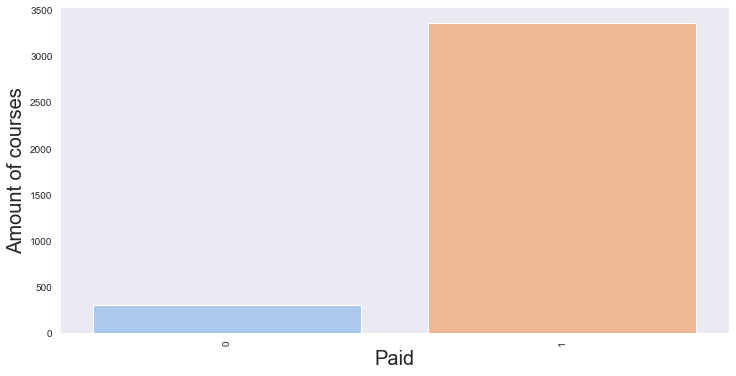

In [24]:
#We can see that we need to adjust the False and True - we have different variations.
df['is_paid']=df['is_paid'].replace('False','FALSE')
df['is_paid']=df['is_paid'].replace('True','TRUE')

Free_or_not=sql('''select is_paid,count(is_paid) as "Values" from df group by is_paid''')
print(Free_or_not)

plt.figure(figsize=(12,6))
sns.barplot(x='is_paid', y='Values', data=Free_or_not)
plt.xticks(rotation=90)
plt.ylabel('Amount of courses', fontsize = 20)
plt.xlabel('Paid', fontsize = 20)
plt.show()

### Course by topics

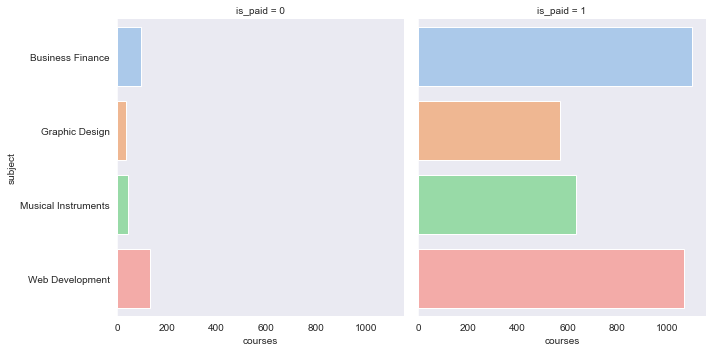

In [26]:
course_by_topics = sql('''select subject, count(course_title) as courses, is_paid from df group by subject, is_paid''')
sns.catplot(y='subject', x='courses', col='is_paid',kind='bar', data=course_by_topics)

### % by subjects with waffle chart

               subject      Share
0      Web Development  32.626427
1     Business Finance  32.490484
2  Musical Instruments  18.488309
3       Graphic Design  16.394780


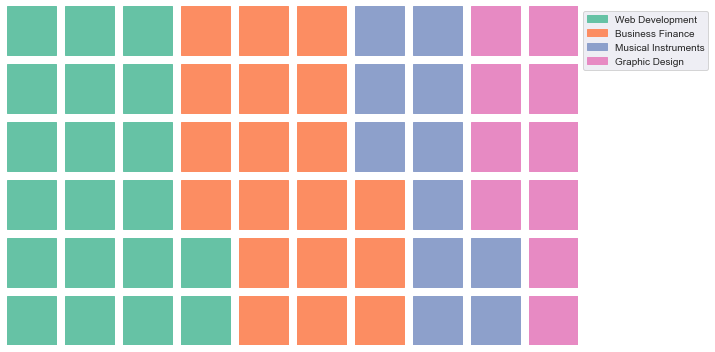

In [31]:
courses_per = sql('''select subject, 100.*count(course_title)/sum(count(course_title)) over () as Share from df group by subject order by Share desc''')

waffle = plt.figure(
FigureClass=Waffle,rows=6,columns=10, values=course_per.Share, labels=list(course_per.subject),
legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(16,5)
)
print(courses_per)


<Figure size 1800x720 with 0 Axes>

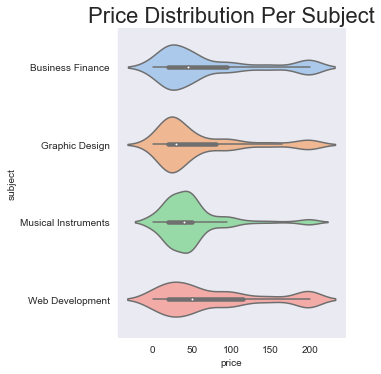

In [33]:
plt.figure(figsize=(25,10))
sns.catplot(x='price', y='subject', data=df, kind='violin')
plt.title('Price Distribution Per Subject', fontsize = 22)
plt.show()

### Top 20 popular courses

ValueError: left cannot be >= right

<Figure size 864x432 with 0 Axes>

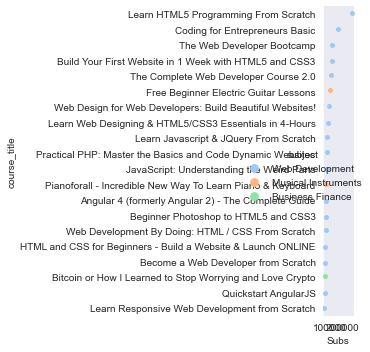

In [41]:
popular_courses = sql('''
select course_title, subject, sum(num_subscribers) as Subs from df group by course_title, 
subject order by Subs Desc limit 20''')

plt.figure(figsize=(12,6))
sns.catplot(x='Subs',y='course_title',hue='subject',data=popular_courses)
plt.xticks(rotation=90)
plt.title("Top 20 Courses by #Subs", fontsize = 22)
plt.ylabel('Course Name', fontsize = 20)
plt.xlabel('Number of Subs', fontsize = 20)
plt.show()

### Subs by level -> beginner, intermediate, advance

<Figure size 864x432 with 0 Axes>

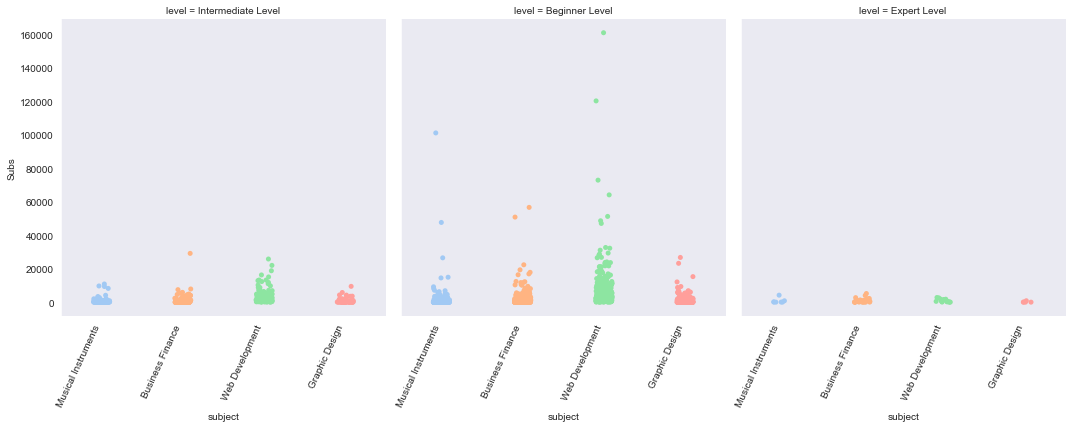

In [44]:
popular_course_level = sql('''
select course_title, subject, level, sum(num_subscribers) as Subs from df 
where level not like ('%All%') group by course_title, subject , level
''')

plt.figure(figsize=(12,6))
g=sns.catplot(x='subject',y='Subs',col='level',data=popular_course_level)
g.set_xticklabels(rotation=65, horizontalalignment='right')

### Prices of the course level wise

<Figure size 864x432 with 0 Axes>

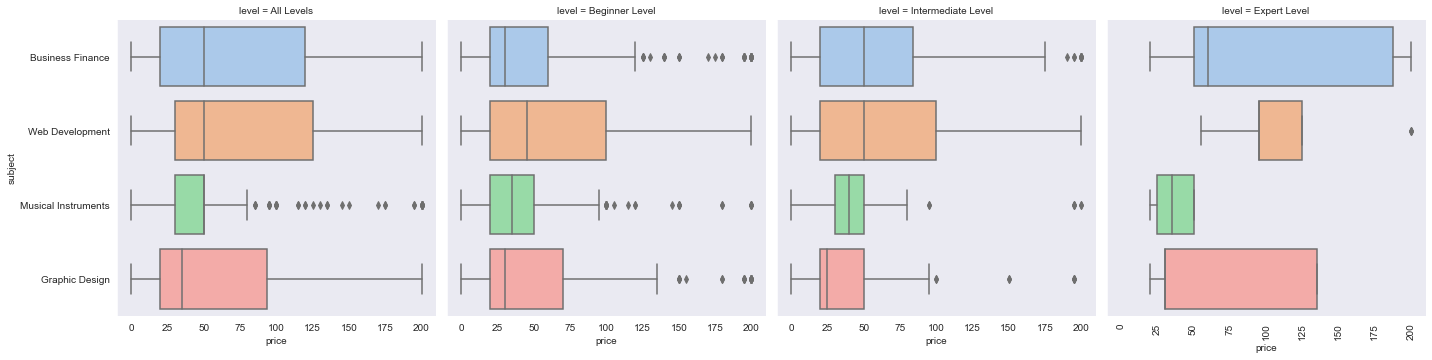

In [46]:
beginner = sql('''
select course_title, subject, level, price from df
group by course_title, subject, level
order by price desc
''')

plt.figure(figsize=(12,6))
sns.catplot(x='price',y='subject',col='level',kind='box',data=beginner)
plt.xticks(rotation=90)
plt.show()

### Courses published during the years

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

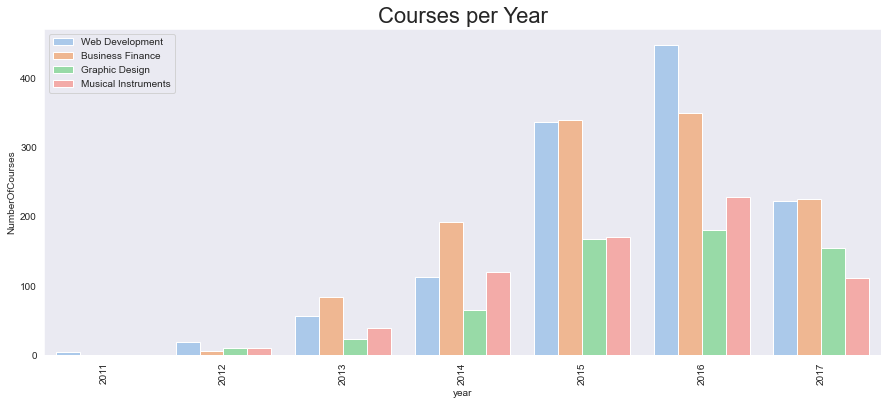

In [51]:
per_year = sql('''
select year, subject, sum(count(course_title)) over (partition by year, subject) as NumberOfCourses from df
group by year, subject
order by year''')

plt.figure(figsize=(15,6))
g2=sns.barplot(x='year',y='NumberOfCourses',data=per_year,hue='subject')
plt.title('Courses per Year',fontsize=22)    
plt.legend(loc='upper left')      
plt.xticks(rotation=90)